In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# reflect the tables

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement,Station=Base.classes.measurement, Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session=Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [14]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2017-08-01', '2017-08-07'))
temp=calc_temps('2017-08-01', '2017-08-07')
min_t, avg_t, max_t=temp[0][0],temp[0][1],temp[0][2]
print(min_t, avg_t, max_t)

[(72.0, 79.25, 83.0)]
72.0 79.25 83.0


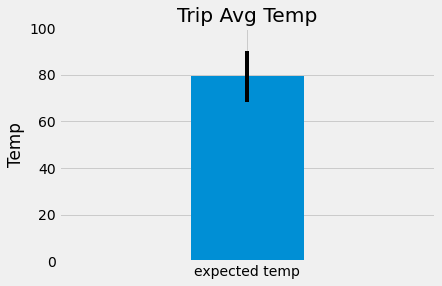

In [90]:
# Plot the results from your previous query as a bar chart. 
plt.bar(x="expected temp",height=avg_t,width=0.6,yerr=(max_t-min_t))
plt.title('Trip Avg Temp')
plt.ylabel('Temp')
plt.ylim(0, 100)    
plt.xlim(-1, 1)
plt.savefig('../Images/bonus_barchart_temp.png')
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

### Daily Rainfall Average

In [38]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [39]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [54]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
#start_dt =dt.date.fromisoformat(start_date)
end_date = '2017-08-07'
#end_dt =dt.date.fromisoformat(end_date)
# Use the start and end date to create a range of dates
dates_range=pd.date_range(start_date,end_date).date




.


In [64]:
normals=[]
date_list=[]
for i in dates_range:
    # Strip off the year and save a list of strings in the format %m-%d
    date=i.isoformat()[5:]
    print(date)
    date_list.append(date)
    # Use the `daily_normals` function to calculate the normals for each date string 
    # and append the results to a list called `normals`
    normals.append(daily_normals(date)[0])
print(date_list)
print(normals)

08-01
08-02
08-03
08-04
08-05
08-06
08-07
['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']
[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0)]


In [83]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df=pd.DataFrame(normals, columns=['tmin','tavg','tmax']).set_index(dates_range)
normals_df.index.set_names('Date', inplace=True)
normals_df

,tmin,tavg,tmax
Date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


In [ ]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

<Figure size 576x432 with 0 Axes>

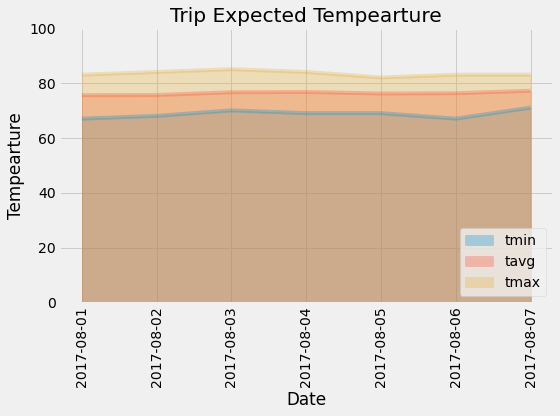

In [103]:
# Plot the daily normals as an area plot with `stacked=False`
plt.gcf().subplots_adjust(bottom=0.5)
plot1=normals_df.plot.area(rot=90, alpha=0.3, stacked=False)
plt.title('Trip Expected Tempearture')
plt.ylabel('Tempearture')
plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.savefig('../Images/bonus_areaplot_temp.png')

## Close Session

In [104]:
session.close()